<a href="https://colab.research.google.com/github/mithunkumarsr/LearnComputerVisionWithMithun/blob/main/CV6_HarrisCornerDetection_HOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Harris Corner Detection** algorithm using OpenCV. The code includes the necessary steps for computing the Harris corner response and displaying the detected corners on the image.

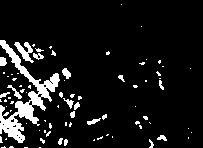

det(M) at (100, 100): 39964.830017089844
trace(M) at (100, 100): 480.234375
R at (100, 100): 30739.82781982422


In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images in Colab

# Load the image
image = cv2.imread('input_image.jpeg', cv2.IMREAD_GRAYSCALE)

# Step 1: Compute gradients using Sobel operator
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in X direction
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in Y direction

# Step 2: Compute products of derivatives
Ix2 = sobel_x ** 2  # I_x^2
Iy2 = sobel_y ** 2  # I_y^2
Ixy = sobel_x * sobel_y  # I_x * I_y

# Step 3: Apply Gaussian smoothing to the gradient products
Ix2 = cv2.GaussianBlur(Ix2, (5, 5), 0)  # Smooth I_x^2
Iy2 = cv2.GaussianBlur(Iy2, (5, 5), 0)  # Smooth I_y^2
Ixy = cv2.GaussianBlur(Ixy, (5, 5), 0)  # Smooth I_x * I_y

# Step 4: Compute the determinant and trace of the matrix M
det_M = Ix2 * Iy2 - Ixy ** 2  # det(M) = λ_1 * λ_2
trace_M = Ix2 + Iy2  # trace(M) = λ_1 + λ_2

# Step 5: Compute Harris response (R)
k = 0.04  # Harris corner detection constant
R = det_M - k * (trace_M ** 2)  # Harris corner response function

# Step 6: Thresholding the Harris response
corner_response = np.zeros_like(image)
corner_response[R > 0.01 * R.max()] = 255  # Mark corners based on R

# Display the result using cv2_imshow
cv2_imshow(corner_response)

# Optionally, print values of R, det(M), and trace(M) at a specific pixel
x, y = 100, 100  # Example pixel location
print("det(M) at (100, 100):", det_M[y, x])  # det(M) = λ_1 * λ_2
print("trace(M) at (100, 100):", trace_M[y, x])  # trace(M) = λ_1 + λ_2
print("R at (100, 100):", R[y, x])  # Harris response R


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, FloatSlider

def harris_corner_detection(block_size, ksize, k):
    # Load the grayscale image
    img = cv2.imread('input_image.jpeg', cv2.IMREAD_GRAYSCALE)

    if img is None:
        print("Error: 'input_image.jpeg' not found. Please make sure the image file is in the same directory as this notebook.")
        return

    # Convert to float32 for corner detection
    img_float = np.float32(img)

    # Apply Harris Corner Detection
    corners = cv2.cornerHarris(img_float, int(block_size), int(ksize), k)

    # Dilate the result for better visualization
    corners_dilated = cv2.dilate(corners, None)

    # Create a copy of the original image to draw corners
    img_corners = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    img_corners[corners_dilated > 0.01 * corners_dilated.max()] = [0, 0, 255]

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Harris Corners')
    plt.imshow(cv2.cvtColor(img_corners, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

# Interactive sliders for Harris Corner Detection parameters
interact(
    harris_corner_detection,
    block_size=IntSlider(value=2, min=2, max=10, step=1, description='Block Size:'),
    ksize=IntSlider(value=3, min=3, max=31, step=2, description='Kernel Size:'),
    k=FloatSlider(value=0.04, min=0.01, max=0.1, step=0.01, description='k Parameter:')
)


interactive(children=(IntSlider(value=2, description='Block Size:', max=10, min=2), IntSlider(value=3, descrip…

<function __main__.harris_corner_detection(block_size, ksize, k)>

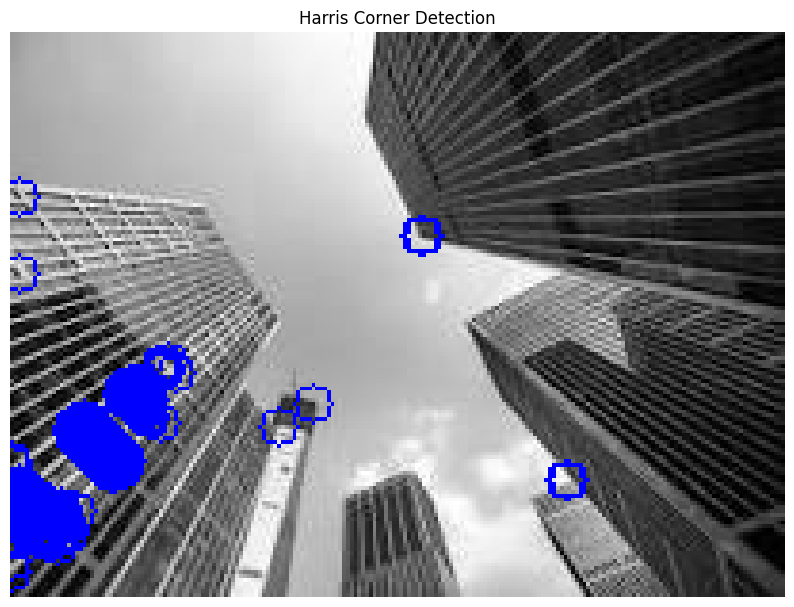

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('input_image.jpeg', cv2.IMREAD_GRAYSCALE)

# Step 1: Compute the gradients along X and Y directions
# Using Sobel operators to find the gradients in the X and Y directions
I_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
I_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Step 2: Compute the products of derivatives
I_x2 = I_x ** 2
I_y2 = I_y ** 2
I_xy = I_x * I_y

# Step 3: Apply Gaussian smoothing to the products of derivatives
# Smoothing helps to reduce noise and get stable results
window_size = 3
S_x2 = cv2.GaussianBlur(I_x2, (window_size, window_size), 0)
S_y2 = cv2.GaussianBlur(I_y2, (window_size, window_size), 0)
S_xy = cv2.GaussianBlur(I_xy, (window_size, window_size), 0)

# Step 4: Compute the determinant and trace of the matrix M
det_M = S_x2 * S_y2 - S_xy ** 2
trace_M = S_x2 + S_y2

# Step 5: Compute the Harris response function
k = 0.04  # Empirical constant for corner detection
R = det_M - k * (trace_M ** 2)

# Step 6: Normalize the response and find the corners
# Normalize the result to display it better
R_normalized = cv2.normalize(R, None, 0, 255, cv2.NORM_MINMAX)

# Step 7: Threshold the Harris response to detect corners
threshold = 100
corners = np.uint8(R_normalized > threshold)

# Step 8: Draw circles around the corners detected
output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Convert to color for visualization
coordinates = np.column_stack(np.where(corners > 0))  # Find the coordinates of corners

for coord in coordinates:
    cv2.circle(output_image, tuple(coord[::-1]), 5, (0, 0, 255), 1)  # Draw red circles

# Step 9: Display the result
plt.figure(figsize=(10, 10))
plt.imshow(output_image)
plt.title("Harris Corner Detection")
plt.axis('off')
plt.show()


Python implementation of **Histogram of Oriented Gradients (HOG)** using OpenCV and scikit-image for feature extraction. HOG is commonly used for object detection, particularly for human detection, and it captures the structure of objects by analyzing local gradient information in small regions of the image.

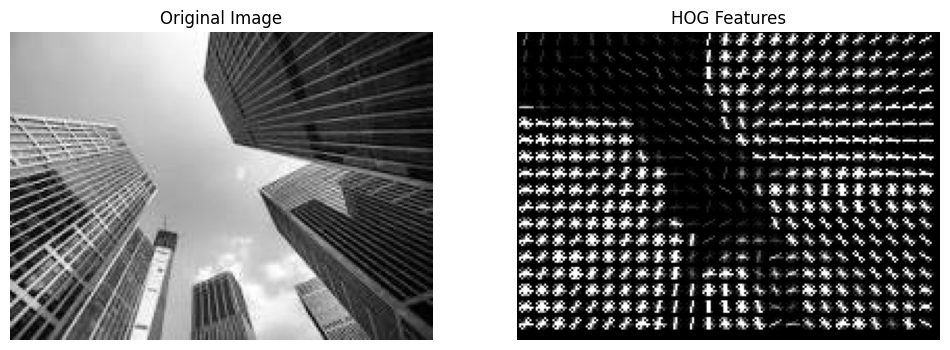

HOG Features Shape: (14688,)


In [5]:
import cv2
import numpy as np
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

# Step 1: Load the image (use grayscale image for HOG)
image = cv2.imread('input_image.jpeg', cv2.IMREAD_GRAYSCALE)

# Step 2: Compute the HOG features and the HOG image
# Parameters:
# - pixels_per_cell: size of each cell (typically 8x8 or 16x16)
# - cells_per_block: number of cells per block for normalization (typically 2x2)
# - visualize: whether to return the HOG image for visualization
features, hog_image = hog(image,
                          pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2),
                          visualize=True,
                          block_norm='L2-Hys')

# Step 3: Improve the visualization of the HOG image by scaling it
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Step 4: Plot the original image and the HOG image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Show original image
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.axis('off')

# Show HOG image
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('HOG Features')
ax2.axis('off')

plt.show()

# Optional: Output the HOG features (used for machine learning or detection)
print("HOG Features Shape:", features.shape)
